## Sales Analysis - Target Market Analysis Project

### Import libraries

In [3]:
import pandas as pd
import glob
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

Hi


### Merging Data with glob.glob method

In [94]:
file_list_2=glob.glob("./Sales_data/*.csv")
master_df2=pd.DataFrame()

for file in file_list_2:
    df2=pd.read_csv(file)
    master_df2=pd.concat([master_df2,df2])
    
master_df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Merging Data with OS Module

In [95]:
#df=pd.read_csv("./Sales_data/Sales_January_2019.csv")

#files=[file for file in os.listdir("./Sales_data")] 

#master_df=pd.DataFrame()


# file in files:
    #df=pd.read_csv("./Sales_data/"+file)
    #master_df=pd.concat([master_df,df])
    
#master_df.head()
#master_df.to_csv("MasterFile.csv",index=False)


In [96]:
MasterFile=pd.read_csv("MasterFile.csv")
MasterFile.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Cleaning

#### Check NaN Values

In [97]:
#MasterFile.info()
MasterFile.shape
MasterFile.isnull().sum()

#MasterFile.isnull().values.any()
#MasterFile.isnull().sum().sum()


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [98]:
# Check NAN values
#MasterFile.iloc[:,0]

MasterFileSorted=MasterFile.sort_values(by="Order ID",ascending=False,na_position="first")
MasterFileSorted


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
67551,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
67550,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
67549,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
67548,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"


In [99]:
# Drop the rows where all elements are missing.
MasterFile=MasterFileSorted.dropna(how="all")
MasterFile
MasterFile.isnull().values.any()
MasterFile.isnull().sum()
MasterFile.shape # 545 rows with missing elements were deleted
MasterFile.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#### Remove bad data

In [100]:
# Order ID
MasterFile["Order ID"].unique()
MasterFile=MasterFile.drop(MasterFile[MasterFile["Order ID"]=="Order ID"].index)
MasterFile["Order ID"].unique()

# Product
MasterFile["Product"].unique()
MasterFile=MasterFile.drop(MasterFile[MasterFile["Product"]=="Order ID"].index)
MasterFile["Product"].unique()

# Quantity Ordered
MasterFile["Quantity Ordered"].unique()
MasterFile=MasterFile.drop(MasterFile[MasterFile["Quantity Ordered"]=="Order ID"].index)
MasterFile["Quantity Ordered"].unique()

# Price Each
MasterFile["Quantity Ordered"].unique()
MasterFile=MasterFile.drop(MasterFile[MasterFile["Quantity Ordered"]=="Order ID"].index)
MasterFile["Quantity Ordered"].unique()

# Order Date
MasterFile["Order Date"].unique()
MasterFile=MasterFile.drop(MasterFile[MasterFile["Order Date"]=="Order ID"].index)
MasterFile["Order Date"].unique()

# Purchase Address
MasterFile["Purchase Address"].unique()
MasterFile=MasterFile.drop(MasterFile[MasterFile["Purchase Address"]=="Order ID"].index)
MasterFile["Purchase Address"].unique()

# Check duplicates
MasterFile.duplicated(keep=False).any()=="True"
MasterFile


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
55510,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"
55509,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
55508,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
55507,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
55506,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
...,...,...,...,...,...,...
67551,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
67550,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
67549,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
67548,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"


#### Type conversion

In [101]:
# Quantity Ordered

MasterFile["Quantity Ordered"]=pd.to_numeric(MasterFile["Quantity Ordered"]).astype(int)

# Price Each

MasterFile["Price Each"]=pd.to_numeric(MasterFile["Price Each"]).astype(float)

# Order Date

MasterFile["Order Date"]=pd.to_datetime(MasterFile["Order Date"])

MasterFile.dtypes

MasterFile

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
55510,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001"
55509,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"
55508,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
55507,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
55506,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
...,...,...,...,...,...,...
67551,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
67550,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
67549,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
67548,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"


### Data Exploration

#### 1. What was the best month for sales? How much was earned that month?

In [102]:
# Check month

MasterFile["Month"]=MasterFile["Order Date"].dt.month
MasterFile

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
55510,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",12
55509,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12
55508,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12
55507,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12
55506,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12
...,...,...,...,...,...,...,...
67551,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1
67550,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
67549,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
67548,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1


In [103]:
# Calculate sales

MasterFile["Sales"]=MasterFile["Quantity Ordered"]*MasterFile["Price Each"]
MasterFile

# % Sales & % Sales per month and sort values in descending order

MasterFile.groupby(MasterFile["Month"]).sum().sort_values(by="Sales",ascending=False)
MasterFile["% Total Sales"]=MasterFile["Sales"]/(MasterFile["Sales"].sum())*100
MasterFile.round(2)

SalesGroupMonth=MasterFile.groupby(MasterFile["Month"]).sum()#.sort_values(by="% Total Sales",ascending=False).round(2)#.astype(str)+"%"
SalesGroupMonth
SalesGroupMonth=SalesGroupMonth.drop(SalesGroupMonth.columns[1],axis=1)
SalesGroupMonth
#MasterFile["% Total Sales"]=round(MasterFile["% Total Sales"],2)
#MasterFile.groupby(MasterFile["Month"]).sum().sort_values(by="% Total Sales",ascending=False)

,Quantity Ordered,Sales,% Total Sales
Month,,,
1,10903,1.822257e+06,5.283123
2,13449,2.202022e+06,6.384147
3,17005,2.807100e+06,8.138402
4,20558,3.390670e+06,9.830299
5,18667,3.152607e+06,9.140100
6,15253,2.577802e+06,7.473616
7,16072,2.647776e+06,7.676484
8,13448,2.244468e+06,6.507206
9,13109,2.097560e+06,6.081288


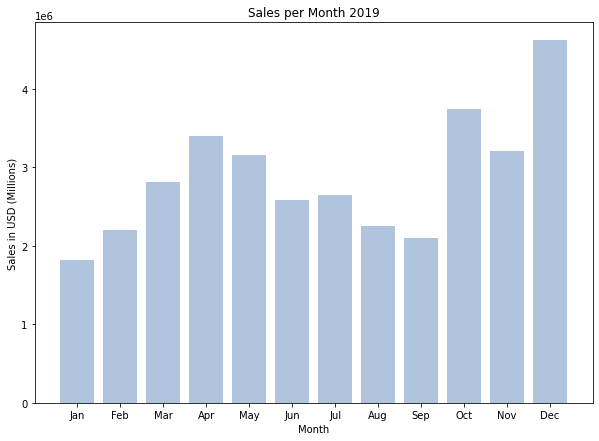

In [104]:
# Bar chart of sales per month in 2019. 

months=[]
for i in range(1,13):
    months.append(calendar.month_abbr[i])
months

plt.figure(figsize=(10,7))
plt.title('Sales per Month 2019')
plt.xlabel('Month')
plt.ylabel('Sales in USD (Millions)')
plt.bar(months,SalesGroupMonth["Sales"],color=['lightsteelblue'])
plt.xticks(months)
#plt.yticks(SalesGroupMonth["Sales"])
plt.show()


##### Insight: The best month for sales was December. Revenue= 13.38% of all sales Vs. January 5.28%.
    

#### 2. What City had the highest number of sales?

In [105]:
# Get city and state
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]
    
MasterFile["City"]=MasterFile["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
MasterFile
SalesGroupCity=MasterFile.groupby(MasterFile["City"]).sum()#.sort_values(by="% Total Sales",ascending=False).round(2)#.astype(str)+"%"
SalesGroupCity=SalesGroupCity.drop(SalesGroupCity.columns[[1,2]],axis=1)
SalesGroupCity


,Quantity Ordered,Sales,% Total Sales
City,,,
Atlanta (GA),16602,2.795499e+06,8.104765
Austin (TX),11153,1.819582e+06,5.275368
Boston (MA),22528,3.661642e+06,10.615906
Dallas (TX),16730,2.767975e+06,8.024970
Los Angeles (CA),33289,5.452571e+06,15.808202
New York City (NY),27932,4.664317e+06,13.522882
Portland (ME),2750,4.497583e+05,1.303948
Portland (OR),11303,1.870732e+06,5.423665
San Francisco (CA),50239,8.262204e+06,23.953947


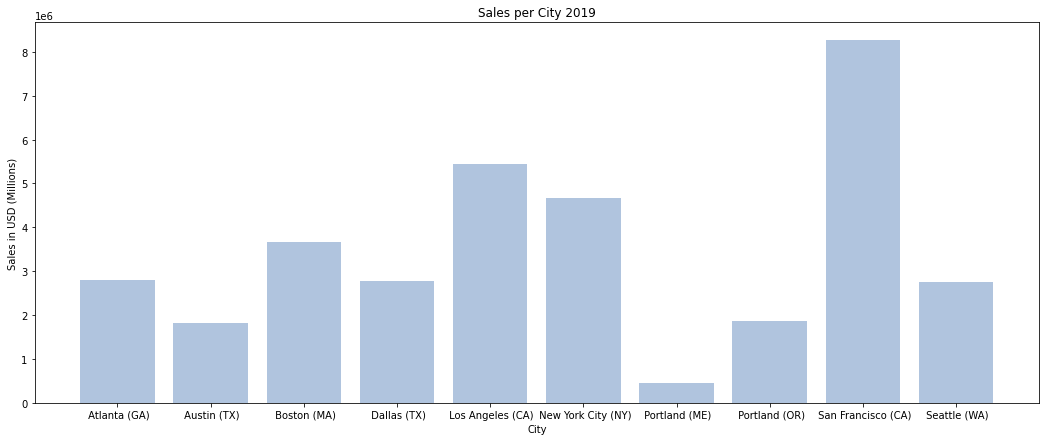

In [106]:
# Bar chart of Sales per City in 2019

cities=[city for city, df in SalesGroupCity.groupby('City')]
plt.figure(figsize=(18,7))
plt.title('Sales per City 2019')
plt.xlabel('City')
plt.ylabel('Sales in USD (Millions)')
plt.bar(cities,SalesGroupCity["Sales"],color=['lightsteelblue'])
plt.xticks(cities) #rotation="vertical"
#plt.yticks(SalesGroupMonth["Sales"])
plt.show()

##### Insight: San Francisco had the highest number of sales, followed by Los Angeles.

#### 3. What time should we display adverstisement to maximize likelihood of customer's buying product?

In [107]:
MasterFile.dtypes
MasterFile['Hour']=MasterFile['Order Date'].dt.hour
MasterFile['Minute']=MasterFile['Order Date'].dt.minute
MasterFile.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,% Total Sales,City,Hour,Minute
55510,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",12,99.99,0.000290,Los Angeles (CA),21,45
55509,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,0.000035,Dallas (TX),10,39
55508,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,0.001160,Seattle (WA),6,43
55507,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,0.000022,Los Angeles (CA),12,1
55506,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,0.000043,San Francisco (CA),20,58


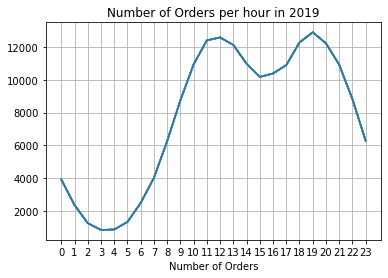

In [130]:
# Line number of orders per hour in 2019.

hours= [hour for hour, df in MasterFile.groupby('Hour') ]
plt.plot(hours,MasterFile.groupby('Hour').count())
plt.title('Number of Orders per hour in 2019')
plt.xticks(hours)
plt.xlabel('Hour')
plt.xlabel('Number of Orders')
plt.grid()
plt.show()

##### Insight: To maximize the likelihood of a customer buying a product, the advertisement should be displayed around 11h00-12h00, lunch time or after office hours 18:00, 19:00 (peak time).

#### 4. What products are most often sold together?


In [109]:
# Create a new DataFrame to analyze Order ID duplicates and products.

MasterFile.shape
OrderDupl=MasterFile[MasterFile['Order ID'].duplicated(keep=False)]
OrderDupl.head(20)

# Add a new column to group all products corresponding to the same order on the same line.

OrderDupl['Grouped']=OrderDupl.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
OrderDupl.head()

# Drop duplicates to keep one single Order ID containing all products of the same order

OrderDupl=OrderDupl[['Order ID','Grouped']].drop_duplicates()
OrderDupl.head()


<ipython-input-109-ad44374b9b87>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OrderDupl['Grouped']=OrderDupl.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
55470,319631,"34in Ultrawide Monitor,Lightning Charging Cable"
55434,319596,"iPhone,Lightning Charging Cable"
55421,319584,"iPhone,Wired Headphones"
55392,319556,"Google Phone,Wired Headphones"
55371,319536,"Macbook Pro Laptop,Wired Headphones"


In [110]:
# Count the pairs ocurring together most frequently
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count=Counter()
for row in OrderDupl['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2))) # 2 can be changed to another number -> number of items you want to see were most commonly sold together

# print(count)

# Show the 10 most common products ordered together
count.most_common(10)

# Or for more readable purposes we can use:

for key, value in count.most_common(10):
    print(key,value)

('Lightning Charging Cable', 'iPhone') 721
('USB-C Charging Cable', 'Google Phone') 678
('Google Phone', 'USB-C Charging Cable') 321
('Wired Headphones', 'iPhone') 300
('Wired Headphones', 'Google Phone') 295
('iPhone', 'Lightning Charging Cable') 294
('USB-C Charging Cable', 'Vareebadd Phone') 268
('Apple Airpods Headphones', 'iPhone') 243
('iPhone', 'Wired Headphones') 162
('Bose SoundSport Headphones', 'Google Phone') 160


#### 5. What product sold the most? Why do you think it sold the most?

In [118]:
MasterFile.head()
product_group=MasterFile.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']
product_group

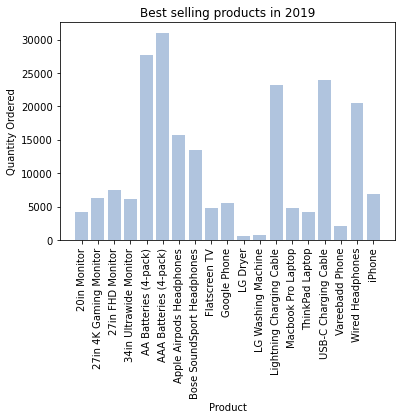

In [129]:
# Bar chart best selling products in 2019

products=[product for product, df in product_group]
plt.title('Best selling products in 2019')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.bar(products,quantity_ordered,color=['lightsteelblue'])
plt.xticks(products, rotation='vertical')
plt.show()

##### Insight: AAA Batteries (4-pack) were sold the most as well as othe products, which are usually cheap and bought in large quantities.
##### Hypothesis: The best selling products have on average a cheaper price.

<ipython-input-138-eeb4ac45bdb7>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical')


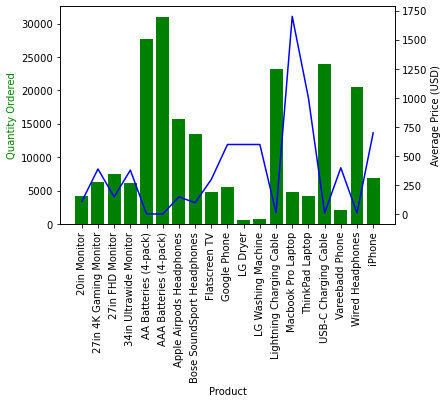

In [138]:
prices=MasterFile.groupby('Product').mean()['Price Each']
#print(prices)

fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Average Price (USD)')
ax1.set_xticklabels(products,rotation='vertical')

plt.show()

##### The quantity ordered is high and the average price is low. This proves that the best selling products have on average a cheaper price and this influences the quantity ordered.